## Exploratory Data Analysis - Airbnb Open Data

#### Goal

Your team works for an international Hotel Chains.

Imagine that your boss would like to know the condition in a specific city, because they want to invest in it. Therefore, your team should base on Airbnb's data and your domain knowledge to provide ideas or suggestions for the boss.

Data sources:

- [Inside Airbnb: Get the Data](http://insideairbnb.com/get-the-data/)
- [Inside Airbnb: Montreal](http://insideairbnb.com/montreal/)
- [Inside Airbnb Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)

#### Data
15 April, 2023
- `listings.csv`: Summary information and metrics for listings in Montreal (good for visualisations).
- `calendar.csv`: The calendar file records the price, availability and other details from the listing's calendar for each day of the next 365 days.

#### Columns:

##### 1. listings.csv

`id`, **integer**: Airbnb's unique identifier for the listing

`name`, **text**: Name of the listing

`host_id`, **integer**: Airbnb's unique identifier for the host/user

`host_name`, **text**: Name of the host. Usually just the first name(s).

`neighbourhood`, **text**

`neighbourhood_group`, **text**: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.

`latitude`, **numeric**	: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

`longitude`, **numeric**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

`room_type`, **text**: All homes are grouped into the following three room types: Private room, Shared room, Entire `place`, Private rooms, Shared rooms, Hotel

`price`, **currency**: daily price in local currency

`minimum_nights`, **integer**: minimum number of night stay for the listing (calendar rules may be different)

`number_of_reviews`, **integer**: The number of reviews the listing has

`last_review`, **date**: The date of the last/newest review

`calculated_host_listings_count`, **integer**: The number of listings the host has in the current scrape, in the city/region geography.

`availability_365`, **integer**: The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.

`number_of_reviews_ltm`, **integer**: The number of reviews the listing has (in the last 12 months)

`license`, **text**: The licence/permit/registration number

##### 2. calendar.csv

`listing_id`, **integer**: Airbnb's unique identifier for the listing

`date`, **datetime**: The date in the listing's calendar

`available`, **boolean**: Whether the date is available for a booking

`price`, **currency**: The price listed for the day

`adjusted_price`, **currency**: The price after adjusting for discounts, cleaning fees, etc.

`minimum_nights`, **integer**: The minimum number of nights required to book the listing on this day

`maximum_nights`, **integer**: The maximum number of nights required to book the listing on this day

### Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Listing: Loading the dataset

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
# head(n) show first n rows
df.head(3)

# set_option() set max rows/columns to display
# pd.set_option('display.max_rows', 10) # show 10 rows
# pd.set_option('display.max_rows', df.shape[0]+1) # show all rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,95,2,410,2023-03-31,2.63,2,253,52,267153
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,339,3,113,2022-12-30,0.83,2,220,25,267153
2,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,14,9,2022-11-18,0.06,1,18,2,261026


In [5]:
df.info()
# df.shape
# len(df)
# df.columns
# df.dtypes
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891 entries, 0 to 7890
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7891 non-null   int64  
 1   name                            7889 non-null   object 
 2   host_id                         7891 non-null   int64  
 3   host_name                       7891 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7891 non-null   object 
 6   latitude                        7891 non-null   float64
 7   longitude                       7891 non-null   float64
 8   room_type                       7891 non-null   object 
 9   price                           7891 non-null   int64  
 10  minimum_nights                  7891 non-null   int64  
 11  number_of_reviews               7891 non-null   int64  
 12  last_review                     64

#### Examine Continous Variables

In [6]:
# describe() show summary statistics of numerical columns
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7891.000000,7891.000000,7891.000000,6447.000000,7891.000000,7891.000000,7891.000000
mean,165.791535,25.498416,32.973514,1.755016,13.178431,175.583830,12.907616
std,1253.196217,51.748821,60.926869,1.897530,19.963575,115.300637,19.612448
min,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,70.000000,2.000000,1.000000,0.360000,1.000000,74.000000,0.000000
50%,103.000000,31.000000,10.000000,1.080000,4.000000,168.000000,4.000000
75%,157.000000,31.000000,37.000000,2.550000,16.000000,276.500000,18.000000
max,108546.000000,1125.000000,826.000000,23.100000,109.000000,365.000000,280.000000


#### Show specific data type in dataframe

In [7]:
df.select_dtypes(include=['number'])

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,29059,125031,NaN,45.519390,-73.564820,95,2,410,2.63,2,253,52
1,29061,125031,NaN,45.519290,-73.564930,339,3,113,0.83,2,220,25
2,34715,149769,NaN,45.538180,-73.603600,160,14,9,0.06,1,18,2
3,36301,381468,NaN,45.530260,-73.584130,160,32,47,0.49,7,228,5
4,46626,208453,NaN,45.470120,-73.607250,65,3,43,0.30,2,256,19
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,869126335206231055,20290380,NaN,45.522900,-73.592140,60,31,0,NaN,3,305,0
7887,869135605249510433,501033113,NaN,45.519497,-73.554780,191,1,0,NaN,2,47,0
7888,869143453824412582,20290380,NaN,45.522843,-73.589931,52,31,0,NaN,3,121,0
7889,869358975197129418,265632776,NaN,45.476532,-73.612429,60,31,0,NaN,3,363,0


In [8]:
df.select_dtypes(include=['object'])

,name,host_name,neighbourhood,room_type,last_review,license
0,Lovely studio Quartier Latin,Maryline,Ville-Marie,Entire home/apt,2023-03-31,267153
1,Maison historique - Quartier Latin,Maryline,Ville-Marie,Entire home/apt,2022-12-30,267153
2,Chez Patrac ! Montreal - Métro Beaubien,Alain,Rosemont-La Petite-Patrie,Entire home/apt,2022-11-18,261026
3,Romantic & peaceful Plateau loft,Sylvie,Le Plateau-Mont-Royal,Entire home/apt,2023-03-05,NaN
4,Beautiful! Charming! Spacious! Rooms!,Maureen,Côte-des-Neiges-Notre-Dame-de-Grâce,Private room,2023-01-01,305995
...,...,...,...,...,...,...
7886,Casa 202 - MileEnd Parc Lahaie,Kinza,Le Plateau-Mont-Royal,Entire home/apt,NaN,875752
7887,Amazing apartment in the Heart of the Village.,Elie,Ville-Marie,Entire home/apt,NaN,300547
7888,Casa 203 - MileEnd Parc Lahaie,Kinza,Le Plateau-Mont-Royal,Entire home/apt,NaN,875753
7889,Treetop Oasis I,Howard,Côte-des-Neiges-Notre-Dame-de-Grâce,Private room,NaN,NaN


In [10]:
df[df['price'] == df['price'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3756,53088650,"room in a shared apartment, the (room may not ...",308782563,Sahil Rao,NaN,Le Plateau-Mont-Royal,45.5131,-73.56996,Private room,108546,1000,0,NaN,NaN,1,0,0,NaN


In [9]:
df['neighbourhood'].value_counts()

Ville-Marie                                 2641
Le Plateau-Mont-Royal                       1780
Le Sud-Ouest                                 629
Côte-des-Neiges-Notre-Dame-de-Grâce          608
Mercier-Hochelaga-Maisonneuve                482
Rosemont-La Petite-Patrie                    468
Villeray-Saint-Michel-Parc-Extension         297
Ahuntsic-Cartierville                        191
Verdun                                       169
LaSalle                                      102
Saint-Laurent                                 91
Lachine                                       61
Outremont                                     38
Anjou                                         37
Rivière-des-Prairies-Pointe-aux-Trembles      36
Saint-Léonard                                 34
Westmount                                     33
Pierrefonds-Roxboro                           33
Beaconsfield                                  25
Mont-Royal                                    23
Pointe-Claire       

## Listing: Data Cleaning

Common data cleaning steps include:

1. **Duplicate data**: Delete duplicate information
2. **Irrelevant data**: Identify key fields for specific analysis and remove irrelevant data from the analysis
3. **Outliers**: Outliers significantly affect model performance, so you need to identify outliers and determine the appropriate action
4. **Missing data**: Mark and delete or estimate missing data
5. **Structural errors**: Correct printing errors and other inconsistencies and make the data conform to the general pattern or agreement

#### Delete duplicate data

In [4]:
# find the duplicated rows in the dataframe
print(df.duplicated())
print(df[df.duplicated()])

df.drop_duplicates(inplace=True)

0       False
1       False
2       False
3       False
4       False
        ...  
7886    False
7887    False
7888    False
7889    False
7890    False
Length: 7891, dtype: bool
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license]
Index: []


### Remove inrelevant columns

In [5]:
# remove columns: id, neighbourhood_group, laitude, longitude
# drop(columns, axis, inplace)
# columns: list of column names to drop; 
# axis: 0 for row, 1 for column; 
# inplace: True for modify df, False for return a copy

df1 = df.drop(columns=['id','neighbourhood_group','last_review'], axis=1, inplace=False)

df1.head(3)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.51939,-73.56482,Entire home/apt,95,2,410,2.63,2,253,52,267153
1,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.51929,-73.56493,Entire home/apt,339,3,113,0.83,2,220,25,267153
2,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,14,9,0.06,1,18,2,261026


#### (Optional) Remove outliers

If the data > Q3 + 1.5 * IQR or data < Q1 - 1.5 * IQR, then it is an outlier.

Futher, if the date is an outlier given that the review and availability_365 are 0, then we can judge that the listing is low activity.

/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_32679/2303708740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price'])


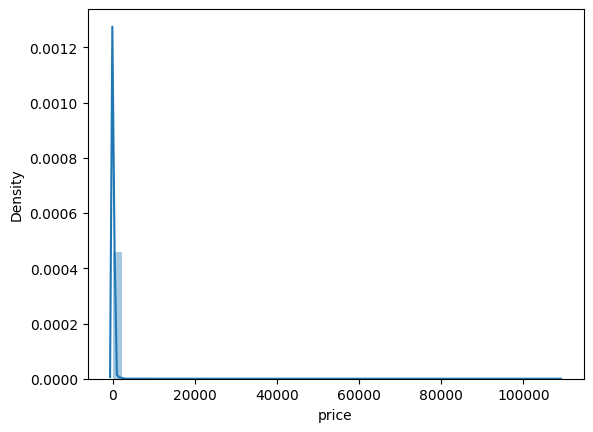

Skewness: 82.24
Kurtosis: 7094.31


In [8]:
# check whether the distribution of price is normal distribution
sns.distplot(df1['price'])
plt.show()

# skewness and kurtosis
print("Skewness: {:.2f}".format(df1['price'].skew()))
print("Kurtosis: {:.2f}".format(df1['price'].kurt()))

# Skewness: 82.24, it's right skewed
# Kurtosis: 7094.31, it's heavy-tailed

In [9]:
# define the function to remove outliers
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR for {col_name} is {iqr}')
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    print(f'[{lower_bound}, {upper_bound}]')
    # keep rows with values within 1.5*iqr of q1 and q3
    df_inliers = df.loc[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
    return df_inliers

# remove outliers from price
df2 = remove_outliers(df1, 'price')

IQR for price is 87.0
[-60.5, 287.5]


/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_32679/1440783782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price'])


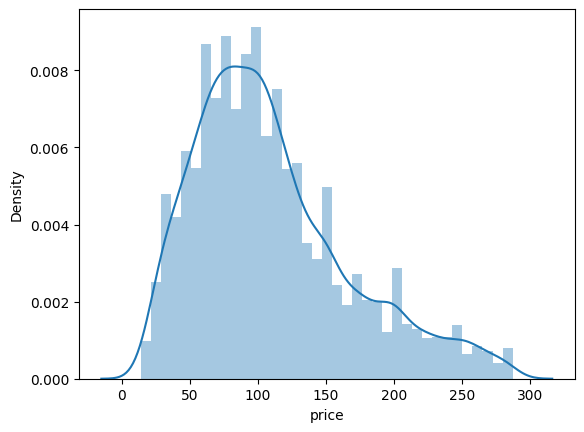

Skewness: 0.89
Kurtosis: 0.35


In [10]:
sns.distplot(df2['price'])
plt.show()

# skewness and kurtosis
print("Skewness: {:.2f}".format(df2['price'].skew()))
print("Kurtosis: {:.2f}".format(df2['price'].kurt()))

In this case, we can't demonstrate the outliers are wrong & meaningless data, so we will keep them.

In [12]:
# how many rows are removed
print(f'Number of rows removed: {df1.shape[0] - df2.shape[0]}')

Number of rows removed: 632


### Missing values and duplicated values 

In [13]:
# use isnull() to check missing values of each column
df1.isnull().sum()

name                                 2
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3901
dtype: int64

In [14]:
# replace nan with "0" in last review and reviews_per_month
df1['reviews_per_month'].fillna(0, inplace=True)

print(df1.isnull().sum())

name                                 2
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3901
dtype: int64


In [36]:
df1[df1['name'].isnull()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
156,NaN,1646154,Dimitri,Le Sud-Ouest,45.45053,-73.60031,Entire home/apt,38,40,39,0.32,6,248,1,0
157,NaN,1646154,Dimitri,Le Sud-Ouest,45.45225,-73.60177,Entire home/apt,40,40,64,0.52,6,259,6,0


In [37]:
# restructre the license column to 0/1
df1['license'].fillna(0, inplace=True)
df1['license'] = df1['license'].apply(lambda x: 0 if x == 0 else 1)

print(df1.isnull().sum())

name                              2
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64


## Listing: Explorative Data Analysis

#### Room type analysis

In [78]:
print('Get the percentage of each room type:')
print(df1['room_type'].value_counts() / len(df1))
# print(df1['room_type'].value_counts().plot(kind='bar', title='Room Type', figsize=(4,3)))

Get the percentage of each room type:
Entire home/apt    0.831454
Private room       0.158788
Shared room        0.007097
Hotel room         0.002661
Name: room_type, dtype: float64


In [18]:
df1.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,6561.0,164.519738,240.273930,15.0,81.0,113.0,173.0,7200.0
Hotel room,21.0,184.571429,88.384711,41.0,137.0,231.0,243.0,350.0
Private room,1253.0,176.807662,3097.315678,14.0,34.0,54.0,83.0,108546.0
Shared room,56.0,61.267857,112.942542,20.0,35.0,41.0,49.0,825.0


In [19]:
print(df1[df1['room_type'] == 'Hotel room'].groupby('host_name')['availability_365'].mean())
print(df1[df1['room_type'] == 'Hotel room'].groupby('host_name')['price'].mean())

host_name
Auberge         310.0
M Montreal      225.9
Maisons & Co    207.5
Name: availability_365, dtype: float64
host_name
Auberge         137.0
M Montreal      130.8
Maisons & Co    243.1
Name: price, dtype: float64


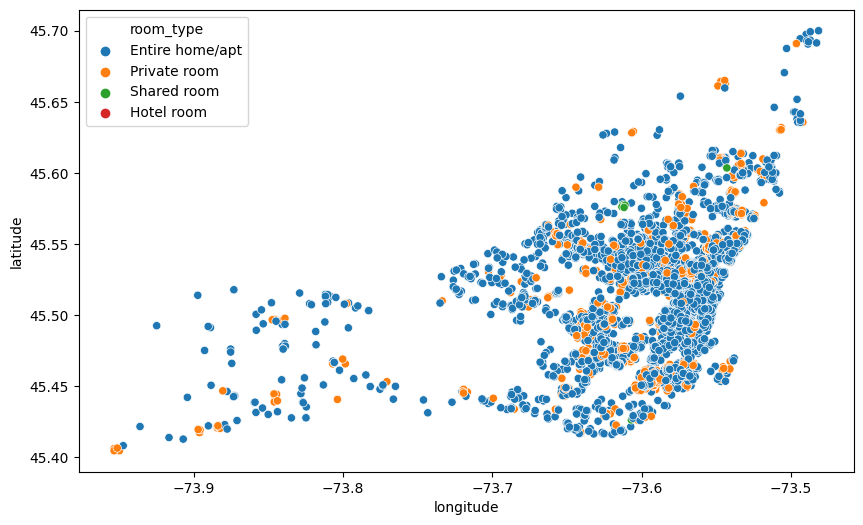

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df1)
plt.ion()
plt.show()
plt.ioff()

In [12]:
df1.groupby('room_type')['license'].mean()

room_type
Entire home/apt    0.506630
Hotel room         1.000000
Private room       0.475658
Shared room        0.875000
Name: license, dtype: float64

#### Neighbourhood analysis

In [21]:
# get the top 10 neighbourhoods with most listings
df1['neighbourhood'].value_counts().head(10) / len(df1)

Ville-Marie                             0.334685
Le Plateau-Mont-Royal                   0.225573
Le Sud-Ouest                            0.079711
Côte-des-Neiges-Notre-Dame-de-Grâce     0.077050
Mercier-Hochelaga-Maisonneuve           0.061082
Rosemont-La Petite-Patrie               0.059308
Villeray-Saint-Michel-Parc-Extension    0.037638
Ahuntsic-Cartierville                   0.024205
Verdun                                  0.021417
LaSalle                                 0.012926
Name: neighbourhood, dtype: float64

In [22]:
plt.figure(figsize=(12,6))
# create the dataframe for top 10 neighbourhoods
df_top10 = df1[df1['neighbourhood'].isin(df1['neighbourhood'].value_counts().head(10).index)]
ax = sns.boxplot(data=df_top10, x='neighbourhood',y='availability_365',palette='plasma')

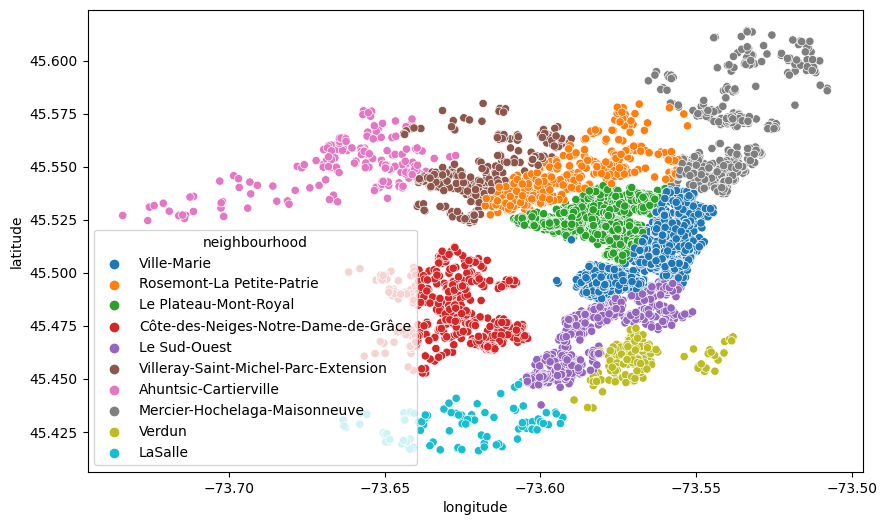

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_top10, x='longitude', y='latitude', hue='neighbourhood')
plt.ion()
plt.show()
plt.ioff()

#### Availability of Room Analysis

In [25]:
# Available of Hotel Room
df1.groupby('room_type')['availability_365'].mean()

room_type
Entire home/apt    171.366712
Hotel room         221.142857
Private room       191.781325
Shared room        290.160714
Name: availability_365, dtype: float64

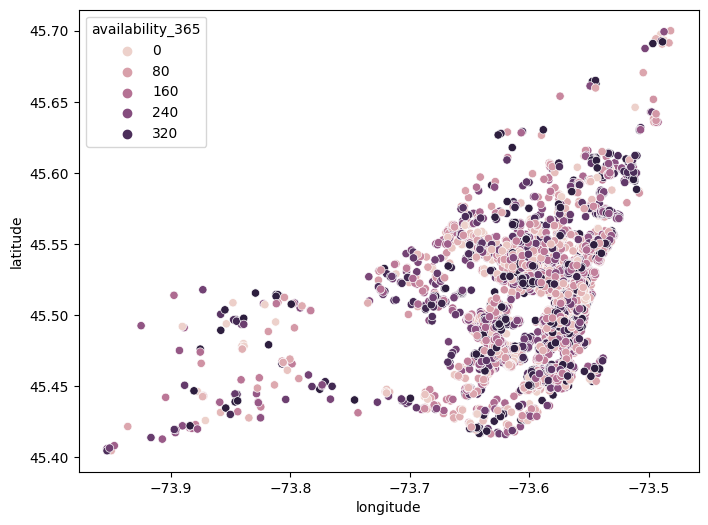

In [26]:
# Available of Hotel Room: the darker the color, the more available
plt.figure(figsize=(8,6))
sns.scatterplot(data=df1, x='longitude', y='latitude', hue='availability_365')
plt.ion()
plt.show()
plt.ioff()

#### Hotel Analysis: listing name contains "hotel"

Some room_type of listings are not "Hotel room" but the name contains "hotel". We can assume that these listings are hotels:

In [58]:
# convert the name column to lowercase
df1['name'] = df1['name'].apply(lambda x: str(x).lower())
df_hotel = df1[df1.name.str.contains('hotel')]

In [74]:
print('Average price of hotel room: ', df_hotel['price'].mean())
df_hotel.groupby('room_type')['price'].mean()

Average price of hotel room:  278.8663101604278


room_type
Entire home/apt    280.577465
Private room       273.466667
Name: price, dtype: float64

In [73]:
print('Number of Hotel Rooms:', len(df_hotel))
df_hotel['neighbourhood'].value_counts()

Number of Hotel Rooms: 187


Ville-Marie                             151
Le Plateau-Mont-Royal                    16
Le Sud-Ouest                             10
Mercier-Hochelaga-Maisonneuve             7
Villeray-Saint-Michel-Parc-Extension      1
Rosemont-La Petite-Patrie                 1
Ahuntsic-Cartierville                     1
Name: neighbourhood, dtype: int64

In [67]:
print('Average price of hotel room in each neighbourhood:')
df_hotel.groupby('neighbourhood')['price'].mean()

Average price of hotel room in each neighbourhood:


neighbourhood
Ahuntsic-Cartierville                     43.000000
Le Plateau-Mont-Royal                    206.875000
Le Sud-Ouest                             207.700000
Mercier-Hochelaga-Maisonneuve            137.428571
Rosemont-La Petite-Patrie               1824.000000
Ville-Marie                              290.284768
Villeray-Saint-Michel-Parc-Extension      99.000000
Name: price, dtype: float64

In [69]:
print('Average availability days of hotel room in each neighbourhood:')
df_hotel.groupby('neighbourhood')['availability_365'].mean().astype(int)

Average availability days of hotel room in each neighbourhood:


neighbourhood
Ahuntsic-Cartierville                     3
Le Plateau-Mont-Royal                   167
Le Sud-Ouest                            200
Mercier-Hochelaga-Maisonneuve           241
Rosemont-La Petite-Patrie               246
Ville-Marie                             230
Villeray-Saint-Michel-Parc-Extension    175
Name: availability_365, dtype: int64

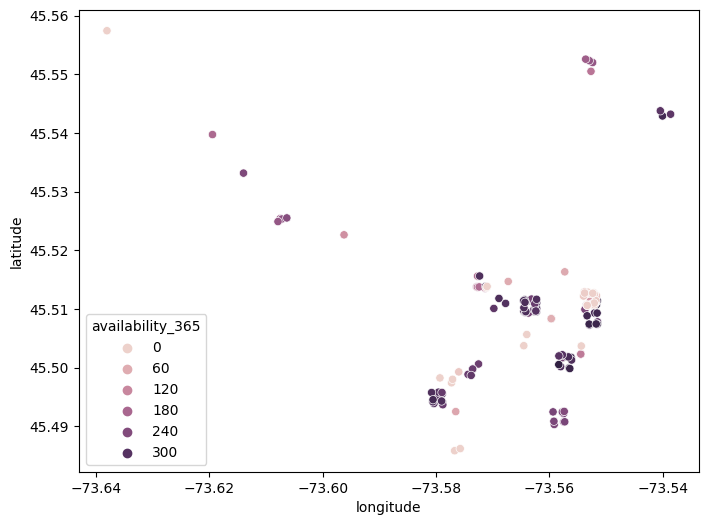

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_hotel, x='longitude', y='latitude', hue='availability_365')
plt.ion()
plt.show()
plt.ioff()

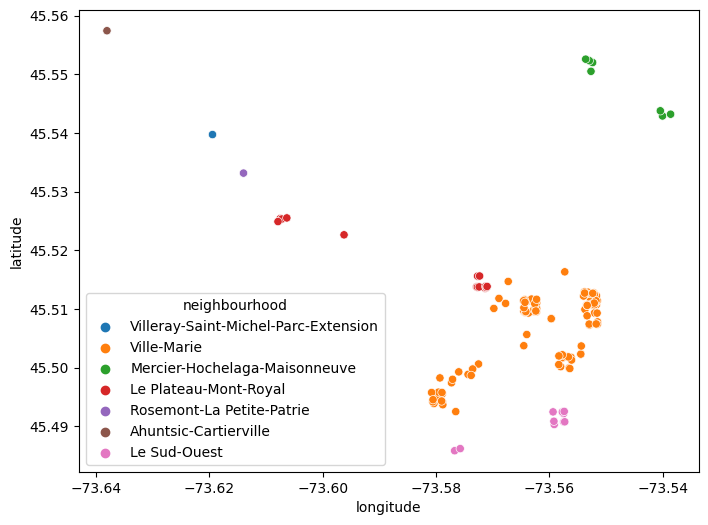

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_hotel, x='longitude', y='latitude', hue='neighbourhood')
plt.ion()
plt.show()
plt.ioff()

#### Correlation analysis

In [27]:
df2 = df_top10.drop(columns=['name','host_id','host_name','latitude','longitude','reviews_per_month'], axis=1, inplace=False)
df2.head(3)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Ville-Marie,Entire home/apt,95,2,410,2,253,52,1
1,Ville-Marie,Entire home/apt,339,3,113,2,220,25,1
2,Rosemont-La Petite-Patrie,Entire home/apt,160,14,9,1,18,2,1


In [28]:
# corr(method='') method: pearson, kendall, spearman. Default is pearson
corr = df2.corr(method='pearson')
corr

/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_30964/3036602328.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr(method='pearson')


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
price,1.000000,0.219595,-0.007333,-0.018528,-0.008640,-0.010200,0.006953
minimum_nights,0.219595,1.000000,-0.116300,-0.154566,0.021218,-0.206129,-0.428758
number_of_reviews,-0.007333,-0.116300,1.000000,-0.047204,-0.050472,0.673829,0.186061
calculated_host_listings_count,-0.018528,-0.154566,-0.047204,1.000000,0.055570,0.049575,0.219592
availability_365,-0.008640,0.021218,-0.050472,0.055570,1.000000,-0.036885,0.000066
number_of_reviews_ltm,-0.010200,-0.206129,0.673829,0.049575,-0.036885,1.000000,0.354828
license,0.006953,-0.428758,0.186061,0.219592,0.000066,0.354828,1.000000


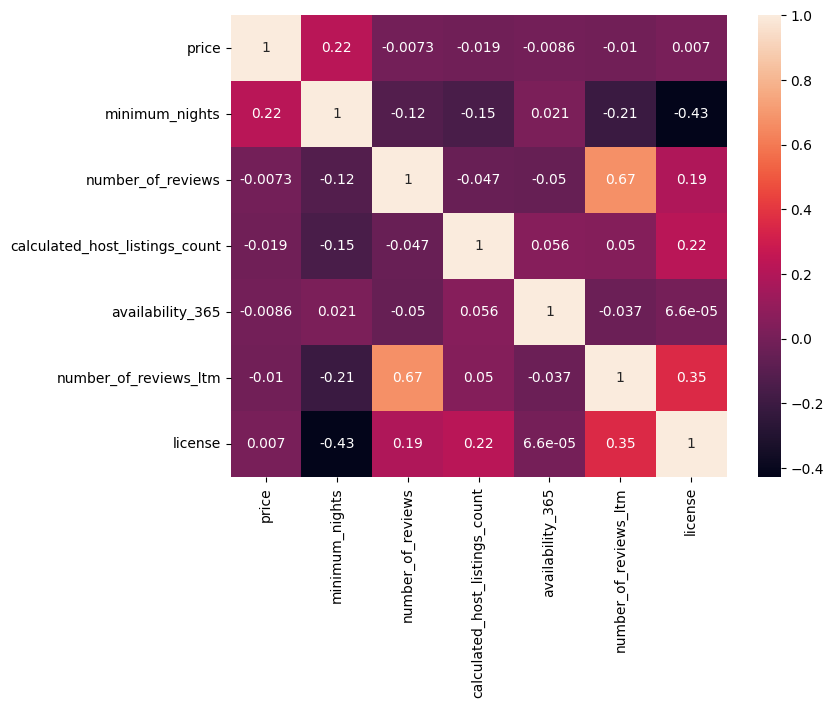

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.ion()
plt.show()
plt.ioff()

### Quick EDA using pandas profiling

In [10]:
# use ydata_profiling to generate EDA report
from ydata_profiling import ProfileReport

profile = ProfileReport(df1, title='Pandas Profiling Report', explorative=True)

In [35]:
# profile

## Calendar: Data Source & Shape

In [45]:
calendar = pd.read_csv('calendar.csv')

In [46]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29059,2023-04-15,f,$99.00,$89.00,2,1125
1,29059,2023-04-16,t,$99.00,$89.00,2,1125
2,29059,2023-04-17,f,$99.00,$89.00,2,1125


In [47]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880215 entries, 0 to 2880214
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 153.8+ MB


### Calendar: Data Cleaning

In [48]:
# check duplicate data
calendar.duplicated().sum()

0

In [49]:
# remove irrelevant columns for price analysis
calendar.drop(columns=['minimum_nights','maximum_nights'], axis=1, inplace=True)

In [50]:
# missing values
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
dtype: int64

In [51]:
# data type checking
calendar.dtypes

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
dtype: object

In [52]:
# convert t/f to 1/0

def tf_to_10(x):
    if x == 't': return 1
    elif x == 'f': return 0
    else: return

calendar.available = calendar.available.apply(lambda x: tf_to_10(x))
print(calendar['available'].value_counts())
print(calendar.dtypes)

0    1494387
1    1385828
Name: available, dtype: int64
listing_id         int64
date              object
available          int64
price             object
adjusted_price    object
dtype: object


In [53]:
# remove '$' and ',' in price and adjusted_price, then convert to float
calendar[['price','adjusted_price']] = calendar[['price','adjusted_price']].apply(lambda x: x.str.replace('$','', regex=True).replace(',','', regex=True).astype(float))
calendar.dtypes

listing_id          int64
date               object
available           int64
price             float64
adjusted_price    float64
dtype: object

In [54]:
# convert date to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                  int64
price                    float64
adjusted_price           float64
dtype: object

### Calendar: Explorative Data Analysis

#### Time Series Analysis

In [55]:
# get the average price of each day
prices = calendar.groupby(['available','date'])['price'].mean().to_frame().reset_index()
prices.head(3)

,available,date,price
0,0,2023-04-15,178.977588
1,0,2023-04-16,154.750579
2,0,2023-04-17,153.682430


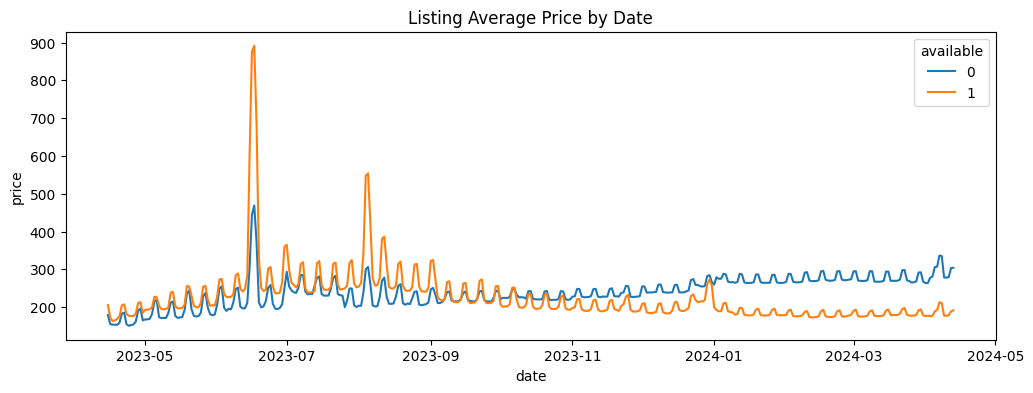

In [40]:
# plot the average price between available and unavailable listings by date
plt.figure(figsize=(12,4))
sns.lineplot(data=prices, x='date', y='price', hue='available')
plt.title('Listing Average Price by Date')
plt.ion()
plt.show()
plt.ioff()

In [86]:
# get the total revenue of each month
revenue_by_month = prices.groupby([prices.date.dt.month,'available'])['price'].sum().to_frame().reset_index()
# reset the column name
revenue_by_month.columns = ['month','available','revenue']

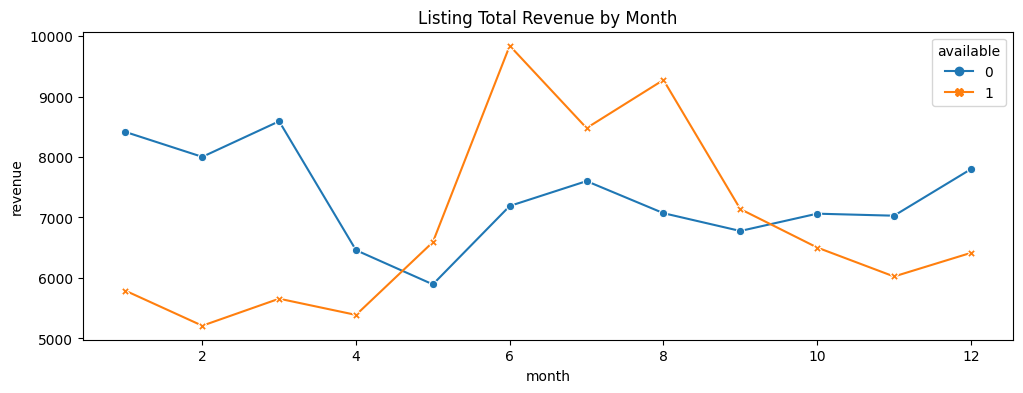

In [87]:
# plot the total revenue between available and unavailable listings by month
plt.figure(figsize=(12,4))
sns.lineplot(data=revenue_by_month, x='month', y='revenue', hue='available', style='available', markers=True, dashes=False)
plt.title('Listing Total Revenue by Month')
plt.ion()
plt.show()
plt.ioff()

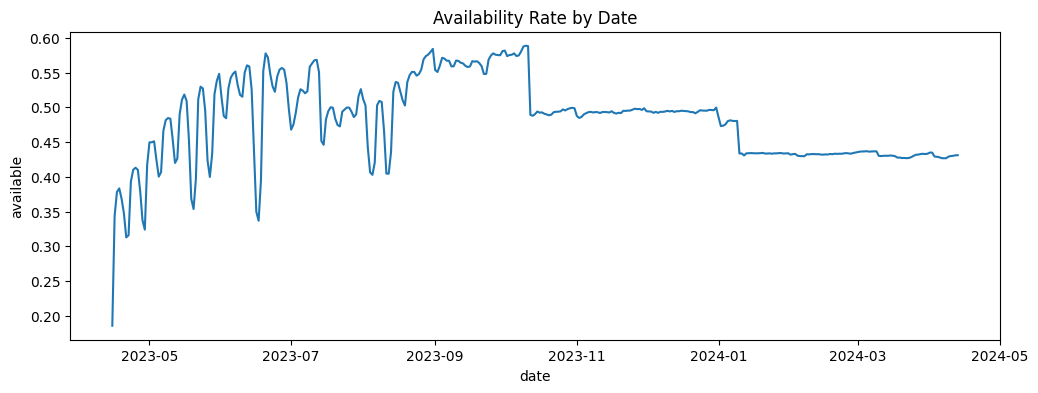

In [43]:
# availability rate = available listings / total listings
availability_rate = calendar.groupby(['date'])['available'].mean().to_frame().reset_index()

# plot the availability rate by date
plt.figure(figsize=(12,4))
sns.lineplot(data=availability_rate, x='date', y='available')
plt.title('Availability Rate by Date')
plt.ion()
plt.show()
plt.ioff()

### Combine Listing and Calendar

#### Revenue Analysis by neighbourhood

In [56]:
# get the total revenue of each unique listing
revenue_by_listing = calendar[calendar.available == 0].groupby(['listing_id'])['price'].sum().to_frame().reset_index()
revenue_by_listing.sort_values(by='price', ascending=False, inplace=True)
revenue_by_listing.columns = ['listing_id','revenue']

In [57]:
# concat the listing name to the dataframe
revenue_by_listing = pd.concat([revenue_by_listing, df1[['name','neighbourhood','room_type']]], axis=1)
revenue_by_listing.head(5)

,listing_id,revenue,name,neighbourhood,room_type
3698,5.308865e+07,39619290.0,Downtown Mega Loft room A,Ville-Marie,Private room
4349,6.152093e+17,3049443.0,"Private room, 5 minutes walking to Metro",Le Sud-Ouest,Private room
2608,4.242870e+07,2555000.0,★Spacious 2BR ★Business/Relocation/TechHub Stay!,Le Plateau-Mont-Royal,Entire home/apt
4892,6.650916e+17,1769930.0,Warming townhouse on the plateau Mont-Royal,Le Plateau-Mont-Royal,Entire home/apt
1520,2.640081e+07,1685570.0,"""5 star reviews"" SPACIOUS Loft Plateau On Mt R...",Le Plateau-Mont-Royal,Entire home/apt


In [58]:
# get the total revenue of each neighbourhood
revenue_by_neighbourhood = revenue_by_listing.groupby(['neighbourhood'])['revenue'].sum().sort_values(ascending=False).to_frame().reset_index()
revenue_by_neighbourhood.head()

,neighbourhood,revenue
0,Ville-Marie,147162421.0
1,Le Plateau-Mont-Royal,71860653.0
2,Le Sud-Ouest,30799970.0
3,Côte-des-Neiges-Notre-Dame-de-Grâce,23445759.0
4,Rosemont-La Petite-Patrie,20432811.0


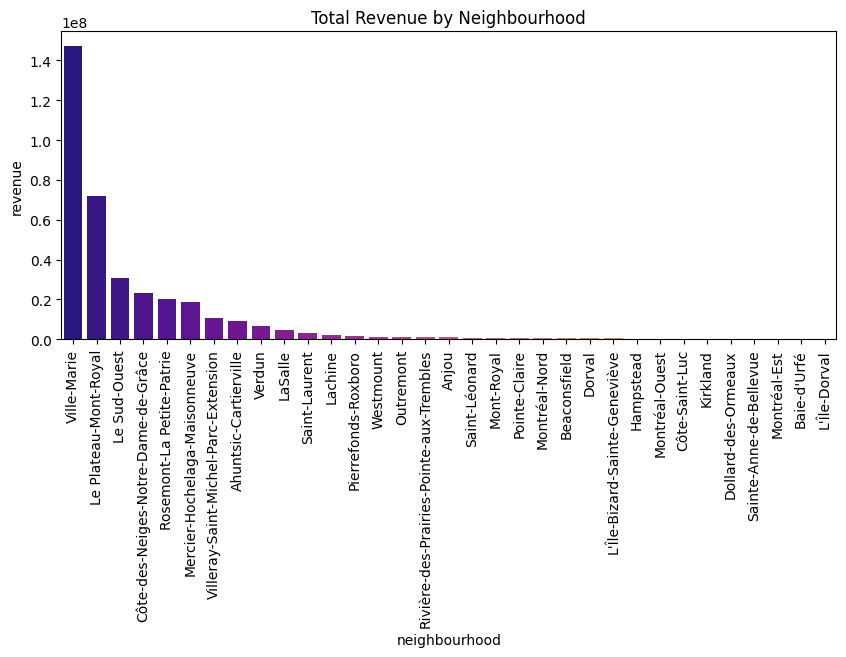

In [118]:
# plot the total revenue of next 365 days by neighbourhood
plt.figure(figsize=(10,4))
sns.barplot(data=revenue_by_neighbourhood, x='neighbourhood', y='revenue', palette='plasma')
plt.title('Total Revenue by Neighbourhood')
plt.xticks(rotation=90)
plt.ion()
plt.show()
plt.ioff()

#### Availability Rate Analysis by neighbourhood

In [59]:
# concat the listing name, neighbourhood, room_type to the calendar dataframe
calendar = pd.concat([calendar, df1[['name','neighbourhood','room_type']]], axis=1)
calendar.head(3)

,listing_id,date,available,price,adjusted_price,name,neighbourhood,room_type
0,29059,2023-04-15,0,99.0,89.0,Lovely studio Quartier Latin,Ville-Marie,Entire home/apt
1,29059,2023-04-16,1,99.0,89.0,Maison historique - Quartier Latin,Ville-Marie,Entire home/apt
2,29059,2023-04-17,0,99.0,89.0,Chez Patrac ! Montreal - Métro Beaubien,Rosemont-La Petite-Patrie,Entire home/apt


In [91]:
print('The availability rate of each neighbourhood: (%)')
availability_rate_by_neighbourhood = calendar.groupby(['neighbourhood'])['available'].mean().to_frame().reset_index()
availability_rate_by_neighbourhood.columns = ['neighbourhood','availability_rate']
availability_rate_by_neighbourhood.sort_values(by='availability_rate', ascending=True).head(10)

The availability rate of each neighbourhood: (%)


,neighbourhood,availability_rate
11,L'Île-Dorval,0.000000
10,L'Île-Bizard-Sainte-Geneviève,0.125000
9,Kirkland,0.142857
32,Westmount,0.242424
20,Montréal-Ouest,0.300000
19,Montréal-Nord,0.307692
28,Sainte-Anne-de-Bellevue,0.333333
23,Pointe-Claire,0.333333
16,Mercier-Hochelaga-Maisonneuve,0.352697
21,Outremont,0.368421


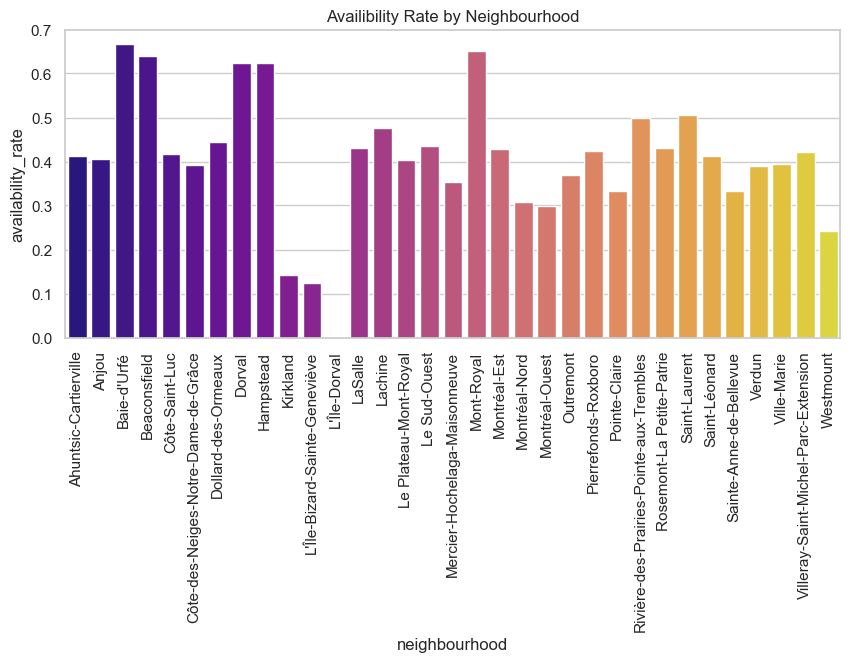

In [156]:
# plot the availability rate of next 365 days by neighbourhood
plt.figure(figsize=(10,4))
sns.barplot(data=availability_rate_by_neighbourhood, x='neighbourhood', y='availability_rate', palette='plasma')
plt.title('Availibility Rate by Neighbourhood')
plt.xticks(rotation=90)
plt.ion()
plt.show()
plt.ioff()

#### Find the neighbourhoods with high revenue and low availability rate

In [105]:
listings_count_by_neighbourhood = calendar.groupby(['neighbourhood'])['listing_id'].count().to_frame().reset_index()
listings_count_by_neighbourhood.columns = ['neighbourhood','listings_count']
listings_count_by_neighbourhood

,neighbourhood,listings_count
0,Ahuntsic-Cartierville,191
1,Anjou,37
2,Baie-d'Urfé,3
3,Beaconsfield,25
4,Côte-Saint-Luc,12
5,Côte-des-Neiges-Notre-Dame-de-Grâce,608
6,Dollard-des-Ormeaux,9
7,Dorval,8
8,Hampstead,8
9,Kirkland,7


In [106]:
neightbourhoods = pd.concat([revenue_by_neighbourhood, availability_rate_by_neighbourhood['availability_rate']], axis=1)
neightbourhoods = pd.concat([neightbourhoods, listings_count_by_neighbourhood['listings_count']], axis=1)
neightbourhoods.sort_values(by='revenue', ascending=False, inplace=True)

In [107]:
print(f'Total Listings: {neightbourhoods.listings_count.sum()}')
neightbourhoods.head(10)

Total Listings: 7891


,neighbourhood,revenue,availability_rate,listings_count
0,Ville-Marie,147162421.0,0.413613,191
1,Le Plateau-Mont-Royal,71860653.0,0.405405,37
2,Le Sud-Ouest,30799970.0,0.666667,3
3,Côte-des-Neiges-Notre-Dame-de-Grâce,23445759.0,0.640000,25
4,Rosemont-La Petite-Patrie,20432811.0,0.416667,12
5,Mercier-Hochelaga-Maisonneuve,18524379.0,0.391447,608
6,Villeray-Saint-Michel-Parc-Extension,10511678.0,0.444444,9
7,Ahuntsic-Cartierville,9217042.0,0.625000,8
8,Verdun,6575483.0,0.625000,8
9,LaSalle,4655886.0,0.142857,7


### Hotel Price Analysis Based on Ville-Marie

#### Hotel Analysis: listing name contains "hotel"

Some room_type of listings are not "Hotel room" but the name contains "hotel", so we can assume that these listings are hotels. 

Let’s create a dataframe called "vm_hotel" to store the listings in Ville-Marie with room_type "Hotel room" or name containing "hotel". 

In [213]:
# convert the name column to lowercase
df1['name'] = df1['name'].apply(lambda x: str(x).lower())

df_hotel = df1.loc[(df1['name'].str.contains('hotel')) | (df1['room_type'] == 'Hotel room')]

# create new column 'revenue' = price * (365 - availability_365)
df_hotel['revenue'] = df_hotel['price'] * (365 - df_hotel['availability_365'])

/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_32679/3521118933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel['revenue'] = df_hotel['price'] * (365 - df_hotel['availability_365'])


In [218]:
vm_hotel = df_hotel.loc[df_hotel['neighbourhood'] == 'Ville-Marie']
vm_hotel.head(3)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,revenue
353,"cozy, like a hotel, apartment!",426511,Naima,Ville-Marie,45.49249,-73.57653,Entire home/apt,126,31,92,0.91,1,69,6,0,37296
868,room 301 | maison saint-vincent,113699303,Maisons & Co,Ville-Marie,45.50684,-73.55306,Hotel room,259,1,45,0.62,18,217,0,1,38332
885,room 302 | maison saint-vincent,113699303,Maisons & Co,Ville-Marie,45.50712,-73.55461,Hotel room,254,1,29,0.41,18,226,0,1,35306


In [215]:
vm_hotel[['price','minimum_nights','number_of_reviews','availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,171.000000,171.000000,171.000000,171.000000
mean,278.198830,1.964912,24.707602,228.883041
std,684.400327,4.586290,37.952089,118.686281
min,37.000000,1.000000,0.000000,0.000000
25%,91.000000,1.000000,3.000000,208.500000
50%,117.000000,1.000000,14.000000,283.000000
75%,238.000000,1.500000,30.000000,312.000000
max,7000.000000,32.000000,261.000000,359.000000


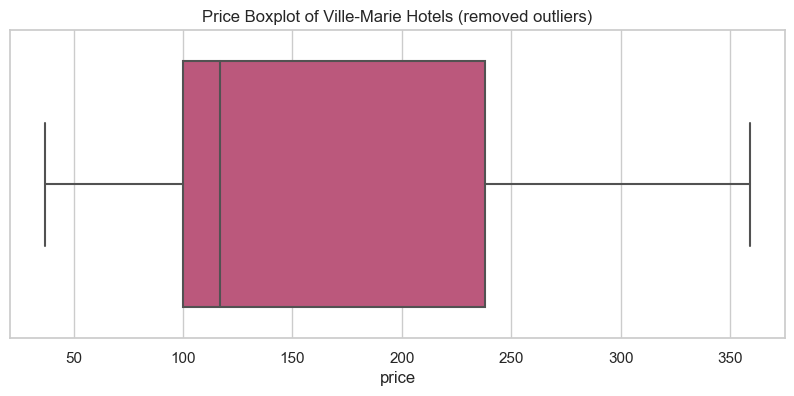

In [217]:
# remove the outliers
Q1 = vm_hotel['price'].quantile(0.25)
Q3 = vm_hotel['price'].quantile(0.75)
IQR = Q3 - Q1
boxplot_price = vm_hotel[(vm_hotel['price'] >= Q1 - 1.5 * IQR) & (vm_hotel['price'] <= Q3 + 1.5 * IQR)]

# remove the listings with 0 availability_365 and 0 number_of_reviews
boxplot_price = boxplot_price[(boxplot_price['availability_365'] != 0) & (boxplot_price['number_of_reviews'] != 0)]

# plot the price boxplot Ville-Marie hotels by seaborn
plt.figure(figsize=(10,4))
sns.boxplot(data=boxplot_price, x='price', palette='plasma', orient='h')
plt.title('Price Boxplot of Ville-Marie Hotels (removed outliers)')
plt.ion()
plt.show()
plt.ioff()


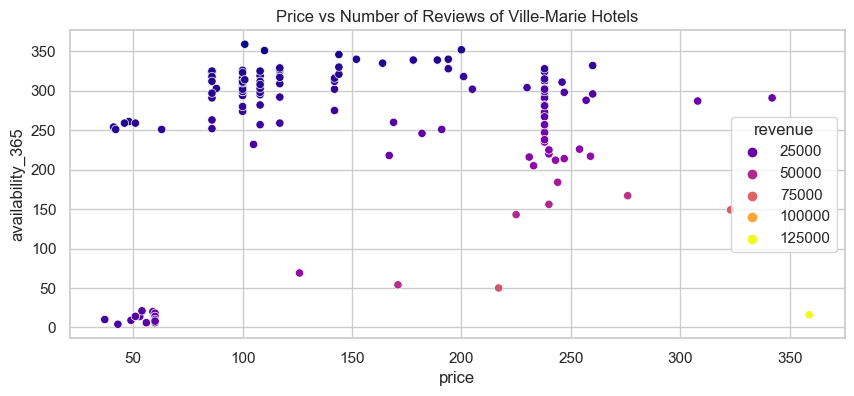

In [219]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=boxplot_price, x='price', y='availability_365', hue='revenue', palette='plasma')
plt.title('Price vs Number of Reviews of Ville-Marie Hotels')
plt.ion()
plt.show()
plt.ioff()

#### Booking Rate Correlation Analysis

In [225]:
df2 = df1.drop(columns=['name','host_id','host_name','latitude','longitude','reviews_per_month'], axis=1, inplace=False)
# create new column 'booking_rate' = (365 - availability_365) / 365
df2['booking_rate'] = (365 - df2['availability_365']) / 365

# Correlation Matrix
corr = df2.corr(method='pearson')
corr

/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_32679/1509215669.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr(method='pearson')


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,booking_rate
price,1.000000,0.206636,-0.007309,-0.018294,-0.007795,-0.010071,0.008445,0.007795
minimum_nights,0.206636,1.000000,-0.116981,-0.146290,0.031041,-0.204226,-0.415651,-0.031041
number_of_reviews,-0.007309,-0.116981,1.000000,-0.049042,-0.056508,0.675681,0.193366,0.056508
calculated_host_listings_count,-0.018294,-0.146290,-0.049042,1.000000,0.035438,0.043984,0.206105,-0.035438
availability_365,-0.007795,0.031041,-0.056508,0.035438,1.000000,-0.045651,-0.010235,-1.000000
number_of_reviews_ltm,-0.010071,-0.204226,0.675681,0.043984,-0.045651,1.000000,0.361913,0.045651
license,0.008445,-0.415651,0.193366,0.206105,-0.010235,0.361913,1.000000,0.010235
booking_rate,0.007795,-0.031041,0.056508,-0.035438,-1.000000,0.045651,0.010235,1.000000


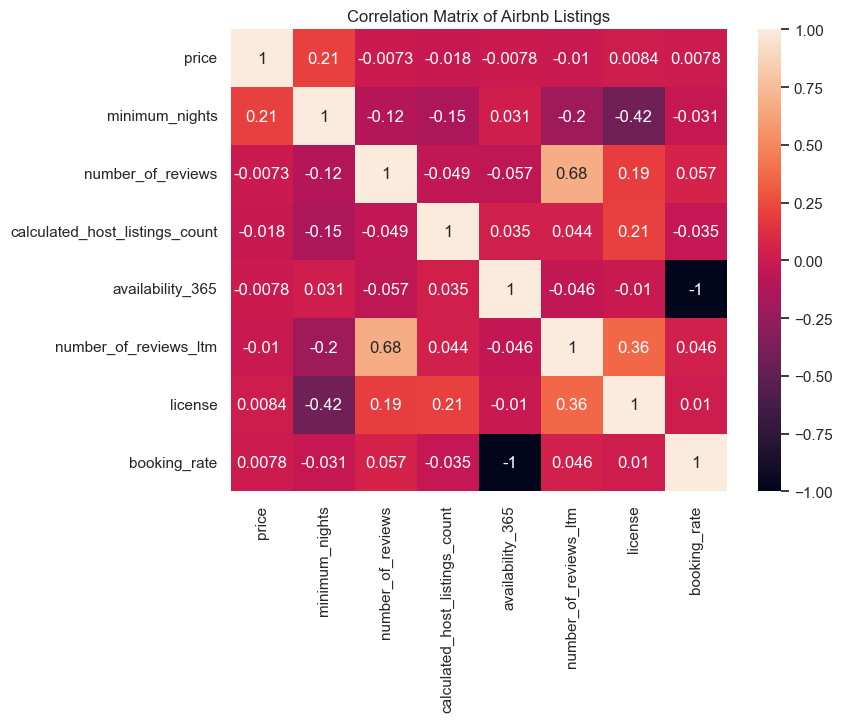

In [230]:
# Correlation Matrix Heatmap by seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix of Airbnb Listings')
plt.ion()
plt.show()
plt.ioff()

As we can see, there is no correlation between 'booking rate' and the other variables. (booking rate = (365 - availability_365) / 365)

#### Availability Rate Analysis in Ville-Marie (Time Series Analysis)

In [238]:
# availability rate = available listings / total listings
vm_availability_rate = calendar.loc[calendar['neighbourhood'] == 'Ville-Marie'].groupby(['date'])['available'].mean().to_frame().reset_index()

/var/folders/p7/l61nv_5s7k9fg4nzcq71t2nc0000gn/T/ipykernel_32679/385059341.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=vm_availability_rate, x='date', y='available', palette='plasma')


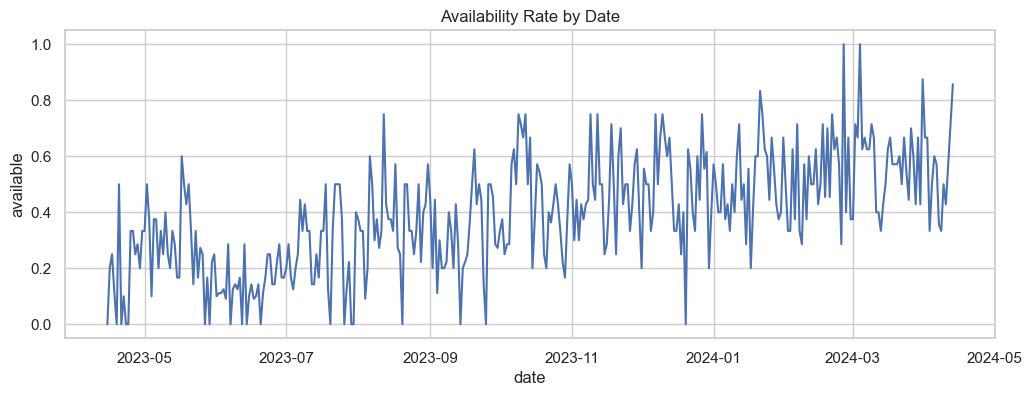

In [243]:
# plot the availability rate by date
plt.figure(figsize=(12,4))
sns.lineplot(data=vm_availability_rate, x='date', y='available', palette='plasma')
plt.title('Availability Rate by Date')
plt.ion()
plt.show()
plt.ioff()